In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("forestfires.csv", sep=",")

In [30]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 1. Ejercicio Covarianza

In [7]:
import numpy as np

In [8]:
# COVARIANZA DE TODAS LAS VARIABLES DEL CONJUNTO DE DATOS

covarianza_df = df.cov()
covarianza_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,5.353568,1.535401,-0.268720,-7.170019,-49.313282,0.065512,-0.688667,3.217602,0.077926,0.044776,9.335731
Y,1.535401,1.512655,-0.314391,0.612960,-30.869004,-0.137321,-0.172134,1.248699,-0.044822,0.012097,3.513139
FFMC,-0.268720,-0.314391,30.471624,135.272459,452.587277,13.384902,13.831997,-27.111933,-0.281718,0.092635,14.098358
DMC,-7.170019,0.612960,135.272459,4101.951889,10838.501342,89.102965,174.639099,77.121359,-12.087923,1.417655,297.592727
DC,-49.313282,-30.869004,452.587277,10838.501342,61536.835467,259.185313,714.751694,-158.640438,-90.430008,2.632813,779.803423
ISI,0.065512,-0.137321,13.384902,89.102965,259.185313,20.788832,10.438820,-9.859163,0.872661,0.091313,2.396689
temp,-0.688667,-0.172134,13.831997,174.639099,714.751694,10.438820,33.716898,-49.969934,-2.362793,0.119421,36.165676
RH,3.217602,1.248699,-27.111933,77.121359,-158.640438,-9.859163,-49.969934,266.259802,2.029220,0.481729,-78.441272
wind,0.077926,-0.044822,-0.281718,-12.087923,-90.430008,0.872661,-2.362793,2.029220,3.210019,0.032409,1.404775
rain,0.044776,0.012097,0.092635,1.417655,2.632813,0.091313,0.119421,0.481729,0.032409,0.087592,-0.138767


In [10]:
# COVARIANZA DE LAS VARIABLES DE INTERES WIND Y rH

covarianza_df.loc["wind", "RH"]

2.0292197082152548

In [11]:
import matplotlib.pyplot as plt

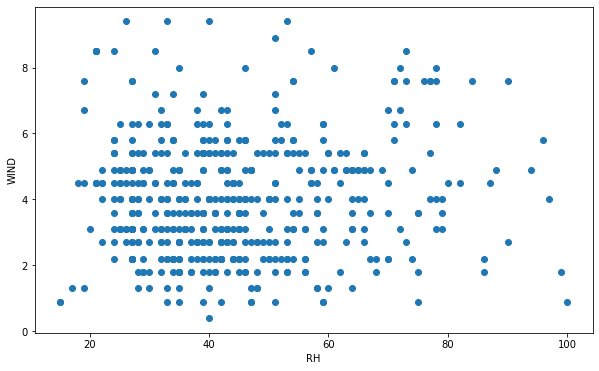

In [28]:
# DIAGRAMA DE DISPERSIÓN

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=df["RH"], y=df["wind"])
plt.xlabel("RH")
plt.ylabel("WIND")
plt.show()

<h3>Conclusiones</h3>

<p>Teniendo en consideración los principios donde:</p>

<ul>
    <li><p>Cov(X,Y) = 0 : No existe relación entre las variables X e Y</p></li>
    <li><p>Cov(X,Y) > 0 : Existe una relación directa o positiva en las variables X e Y</p></li>
    <li><p>Cov(X,Y) < 0 : Existe una relación indirecta o negativa en las variables X e Y</p></li>
</ul>

<p>Podemos afirmar que, al obtener un resultado de <strong>2.0292197082152548</strong> entre las variables "wind" y "RH" existe una relación directa o positiva. Al incrementar la variable wind, incrementara de igual forma los valores de la variable RH</p>

<p>Al observar el gráfico de dispersión podemos afirmar que, si vien existe una relación directa entre las variables wind y RH, esta es muy baja y en el gráfico se puede observar que dicha relación no es del todo fuerte o determinante</p>

## 2. Ejercicio Correlación Lineal

In [32]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
# CALCULO DEL COEFICIENTE DE CORRELACIÓN LINEAL DE PEARSON CON PANDAS

pearson = df["wind"].corr(df["RH"], method="pearson")
print(pearson)

0.06941006715607254


In [92]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [93]:
X = df[["RH"]]
Y = df["wind"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y.values.reshape(-1,1),
    train_size   = 0.8,
    random_state = 1234,
    shuffle = True
)

In [94]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.384
Date:                Tue, 24 May 2022   Prob (F-statistic):              0.123
Time:                        18:00:40   Log-Likelihood:                -834.17
No. Observations:                 413   AIC:                             1672.
Df Residuals:                     411   BIC:                             1680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7223      0.258     14.445      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [132]:
modelo.conf_int(alpha=0.05)

,0,1
const,3.215783,4.228872
RH,-0.002298,0.019123


In [133]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
395,4.243890,0.131801,3.984802,4.502979,0.640967,7.846813
288,3.991521,0.112238,3.770889,4.212153,0.391159,7.591883
507,4.067232,0.091755,3.886864,4.247600,0.469113,7.665351
266,4.185004,0.107136,3.974401,4.395607,0.585243,7.784765
228,3.941047,0.134368,3.676914,4.205181,0.337758,7.544337


In [134]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)

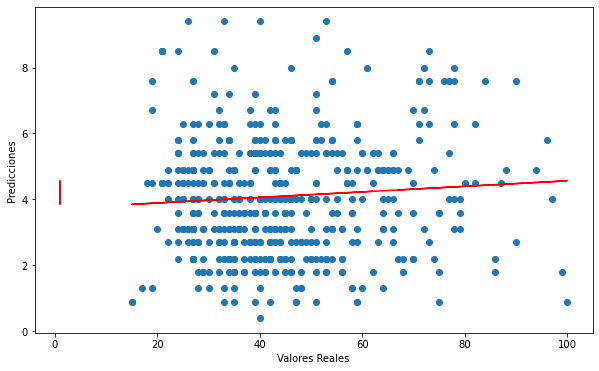

In [136]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=df["RH"], y=df["wind"])
ax.plot(X_train, prediccion_train, color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

<h3>Conclusion:</h3>
<p>Teniendo en consideración el coeficiente de correlación de <strong>0.06941006715607254</strong> y el gráfico de la regresión lineal se puede afirmar que existe una correlación entre variables bastante débil, al obtener un coeficiente demasiado bajo en el gráfico se evidencia también la baja correlación existente entre las variables wind y RH</p>